# Experimental parts of Paper 3 not included in published paper


## Extensions not explored in the published paper: Two-phase karstification ##
A combination of Hypothesis 1 & Hypothesis 2: <br>
First, glaciation covered the valley. Once the glacier retreated, QS was still covered by unkarstifiable units. Later, QS was exposed and connected to the existing network.


CAUTION: You are using the development version of this package.

 This network contains  2  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


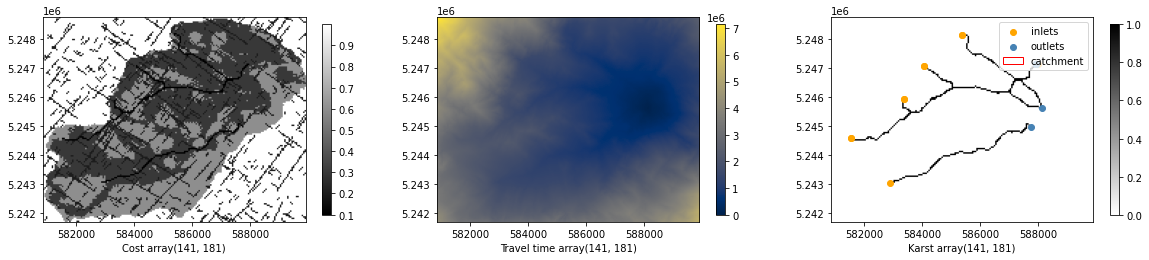

In [41]:
#Load model and simulate anisotropic network with multiple springs:
catchment = pk.SKS('inputs/paper3/settings.yaml')                     #import settings and options from input folder
catchment.set_geological_datafile('inputs/paper3/gempy181x141.csv')     #replace gempy geology with arcmap geology
catchment.set_inlets_data('inputs/paper3/inlets2D_hypothesis3.txt')   #load new inlet file - explicit QO-QA connection
catchment.set_outlets_data('inputs/paper3/outlets2D_hypothesis3.txt') #load new outlet file

#catchment.set_outlets_importance([1,1,1,1])                                 #first just overflow, then each spring in sequence
#catchment.set_inlets_per_outlet([4,1,1,4])                                  #send all to overflow, then group in sequence
catchment.set_outlets_importance([1,1,1,1,1,1])                             #each outlet with its own iteration
catchment.set_inlets_per_outlet([1,1,2,1,1,4])                              #distribute inlets [4,1,1,4]
catchment.set_inlets_importance([1])                                  #assign all inlets to a single iteration (5 inlets total)

catchment.update_all()                                                #update model for changes to take effect
catchment.compute_karst_network()                                   #run the model to calculate the karst network
catchment.show()

In [42]:
#Iterate over many versions:
shuffle = False
catchment = pk.SKS('inputs/paper3/settings.yaml')
catchment.set_geological_datafile('inputs/paper3/gempy181x141.csv')     #replace gempy geology with arcmap geology
catchment.set_inlets_data('inputs/paper3/inlets2D_hypothesis3.txt')   #load new inlet file
catchment.set_outlets_data('inputs/paper3/outlets2D_hypothesis3.txt') #load new outlet file
catchment.set_outlets_importance([1,1,1,1,1,1])                             #each outlet with its own iteration
catchment.set_inlets_per_outlet([1,1,2,1,1,4])                              #distribute inlets [4,1,1,4]
catchment.set_inlets_importance([1])                                  #all inlets in a single iteration per outlet
if shuffle:
    catchment.set_inlets_shuffle(True)                                    #shuffle inlet order each run
    catchment.set_outlets_shuffle(True)                                   #shuffle outlet order each run

n = 100                                                                #number of iterations to calculate (caution: more than 10 is slow)
for i in range(n):
    catchment.update_all()                                            #update model for changes to take effect
    catchment.compute_karst_network() 

CAUTION: You are using the development version of this package.

 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd

 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd

 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd

 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd

 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd

 This network contains  2  connected components

Computing:
 - mean length,cv length,length entropy,mean 

In [ ]:
#Plot many iterations:
print('shuffle = ', shuffle)
f = plt.figure(figsize=(10,10))
ax = f.add_subplot(111, aspect='equal')
ax.set_title('b. Hypothesis 3: Glaciation, then QS obscured (n ='+str(n)+')')

plt.imshow(catchment.get_geology(), origin='lower', extent=catchment.grid.extent, cmap=cmap_geo)
for i in range(n):
    catchment.show_network(ax=ax, data=catchment.karst_simulations[i], simplify=False, labels=[], plot_nodes=False, legend=False, color='k', alpha=1/n)
load_network('inputs/paper3/holloch3D', clean=True, plot=True, ax=ax, color='brown')
plt.scatter(catchment.inlets[:,0],  catchment.inlets[:,1],  c='k')
plt.scatter(catchment.outlets[:,0], catchment.outlets[:,1], c='dodgerblue')

label = False
if label:
    for i,inlet in enumerate(catchment.inlets):
        ax.annotate(str(i), xy=(inlet[0]+30*i,inlet[1]+100),color='k')
    for o,outlet in enumerate(catchment.outlets):
        ax.annotate(str(o), xy=(outlet[0]+30*o,outlet[1]),color='b')

legend = [matplotlib.lines.Line2D([0], [0], marker='o', color='none', markerfacecolor='k', markeredgecolor='none', label='inlet'),
          matplotlib.lines.Line2D([0], [0], marker='o', color='none', markerfacecolor='dodgerblue', markeredgecolor='none', label='outlet'),
          matplotlib.lines.Line2D([0], [0], marker='x', color='none', markerfacecolor='k', markeredgecolor='k', label='closed inlet/outlet'),
          matplotlib.lines.Line2D([0], [0], color='k',     lw=3,      label='simulated conduit'),
          matplotlib.lines.Line2D([0], [0], color='brown', lw=2,      label='mapped conduit'),
          matplotlib.lines.Line2D([0], [0], color='dodgerblue', lw=2,   label='stream'),
          matplotlib.patches.Patch(facecolor='gainsboro', label='sandstone & overlying'),
          matplotlib.patches.Patch(facecolor='darkgray',  label='limestone'),
          matplotlib.patches.Patch(facecolor='dimgrey',   label='marl & older')]
plt.legend(handles=legend, loc=[1.01,0.5])

shuffle =  False

 This network contains  1  connected components

Graph successfully created from file !



## Extensions not explored in the published article: High resolution model ##
- Inlets: N16 (upper Mahdtal), N17 (mid Mahdtal), N18 (Hölloch entrance), random
- Outlets: Sägebach (X), Overflow spring at Höflealpe, Overflow spring at Plattenalpe, Kesselschwand?, Bürgermeister?, Bottom?
- Fractures: from Cramer, and field data?

(1404, 1806) [0. 1.]


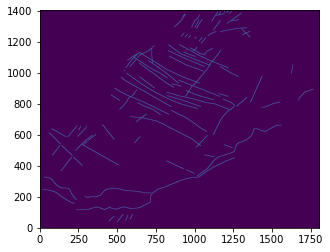

In [19]:
run = False
if run:
    #DEM
    d = np.loadtxt('inputs/paper3/dem5.txt')  #load raw text file
    d[d==-9999]=0                             #replace -9999 with 0 for nan values
    d = np.flipud(d)                          #re-orient
    plt.imshow(d, origin='lower')
    print(d.shape, np.unique(d))
    np.savetxt('inputs/paper3/dem1807x1404.csv', d, delimiter=',') #save as csv

run = False
if run:
    #Geology from ArcMap
    g = np.loadtxt('inputs/paper3/geo5.txt')  #load raw text file
    g[g==-9999]=0                                   #replace -9999 with 0 for nan values
    #g = np.flipud(np.rot90(g))                      #re-orient
    g = np.flipud(g)                                #re-orient
    plt.imshow(g, origin='lower')
    print(g.shape, np.unique(g))
    np.savetxt('inputs/paper3/geo1806x1404.csv', g, delimiter=',') #save as csv
    
run = False
if run:
    #Fractures from ArcMap
    #f = np.loadtxt('inputs/paper3/faults1806x1404.csv', delimiter=',')  #load csv file
    f[f==-9999] = 0                                   #replace -9999 with 0 for nan values
    f[f>0] = 1                                      #replace all values >1 with 1 for faults
    f = np.flipud(f)                                #re-orient
    plt.imshow(f, origin='lower')
    print(f.shape, np.unique(f))
    np.savetxt('inputs/paper3/faults1806x1404.csv', f, delimiter=',') #save as csv


CAUTION: You are using the development version of this package.

 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd
Computation time: 27.81225429999995 sec


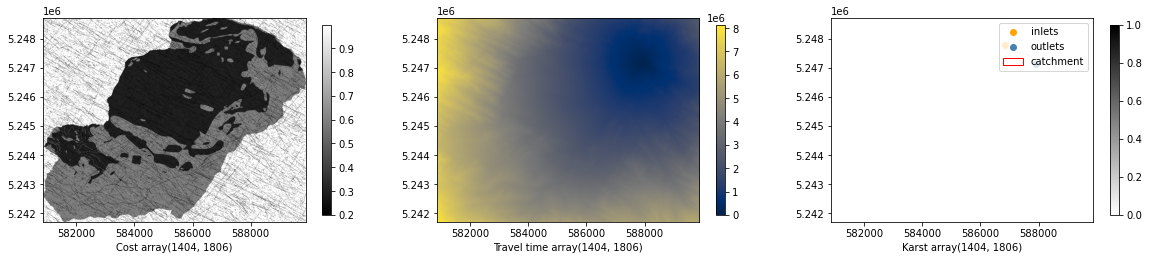

In [42]:
#Load model and simulate anisotropic network with multiple springs:
#caution: if using polygon, this is very slow
#importlib.reload(pk)
start = time.perf_counter()                                            #start timer
catchment = pk.SKS('inputs/paper3/settings_hi_res.yaml')          #import settings and options from input folder
#plt.imshow(catchment.geology.data['fractures']['data'], origin='lower', extent=catchment.grid.extent, cmap='binary')
catchment.compute_karst_network()                               #run the model to calculate the karst network
end = time.perf_counter()                                              #end timer
print('Computation time:', end - start, 'sec')                         #subtract start time from end time to see how long it took
catchment.show()

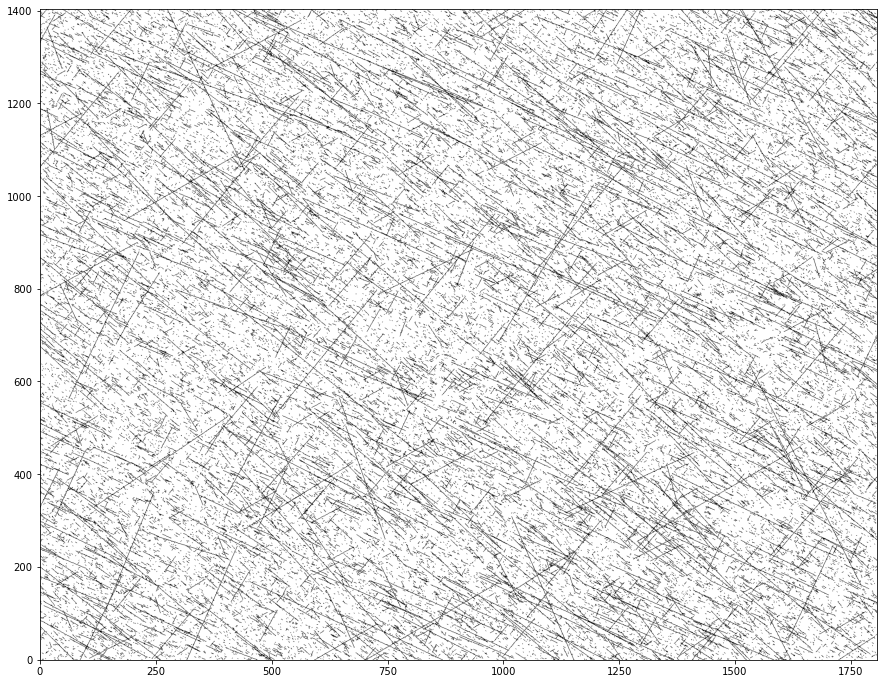

In [67]:
f = plt.figure(figsize=(15,15))
plt.imshow(catchment.geology.data['fractures']['data'], origin='lower', cmap='binary')


 This network contains  1  connected components

Graph successfully created from file !



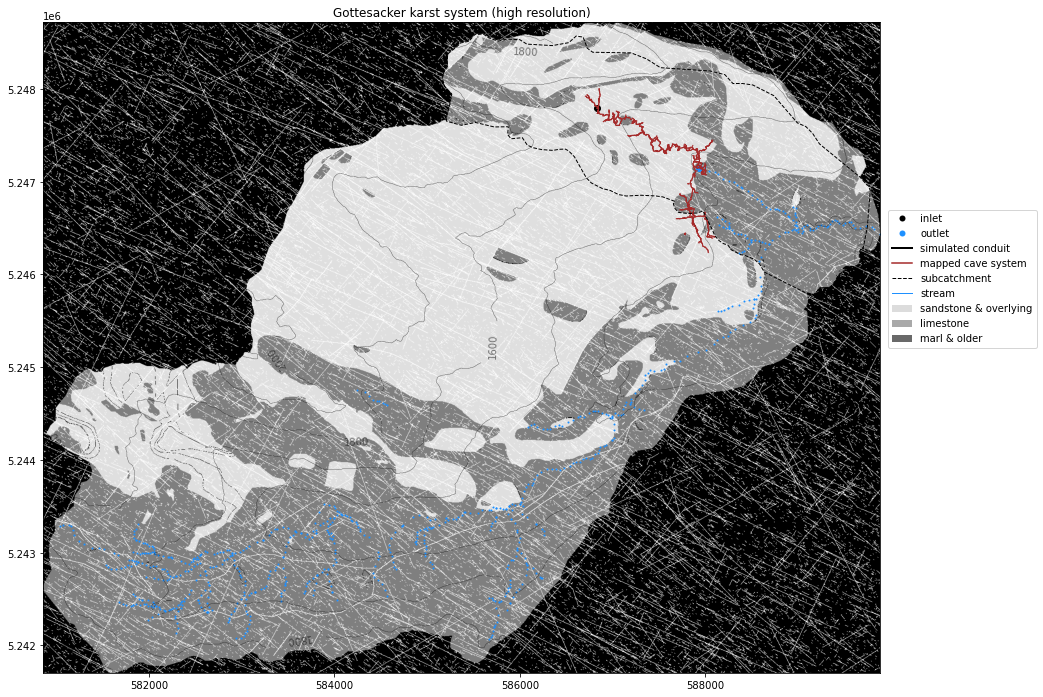

In [58]:
f = plt.figure(figsize=(15,15))
ax = f.add_subplot(111, aspect='equal')  
ax.set_title('Gottesacker karst system (high resolution)')

#Set up fracture and fault plotting:
faults = catchment.get_faults().copy()                                       #get faults array
faults[faults<1] = -1                                                        #set non-fault cells to not display
frac = catchment.get_fractures().copy()                                      #get faults array
frac[frac<1] = -1                                                            #set non-fault cells to not display

#Set up stream plotting and geology custom colormap
streams = np.loadtxt('inputs/paper3/stream_points_all.csv', delimiter=',')  #load raw csv file
polygon = np.loadtxt('inputs/paper3/polygon_mahdtal.txt')  #load raw csv file

cmap_geo = matplotlib.colors.ListedColormap(['white','gainsboro','darkgrey','dimgrey','dimgrey'])   #geology colormap

#PLot geology, fractures and contours:
plt.imshow(catchment.get_geology(), origin='lower', extent=catchment.grid.extent, cmap=cmap_geo)
#plt.imshow(faults,                  origin='lower', extent=catchment.grid.extent, cmap=cmap_frac,     vmin=0,vmax=1)
#plt.imshow(frac,                    origin='lower', extent=catchment.grid.extent, cmap=cmap_frac,     vmin=0,vmax=1)
plt.imshow(catchment.maps['cost'][0], origin='lower', extent=catchment.grid.extent, cmap='binary')
plt.imshow(catchment.geology.fractures['cost'][0], origin='lower', extent=catchment.grid.extent, cmap='binary')

c = plt.contour(catchment.grid.X,catchment.grid.Y, catchment.geology.data['topography']['data'], colors=['k'], alpha=0.5, linewidths=0.5)
plt.clabel(c, inline=True, inline_spacing=20, fontsize=10, fmt='%1.0f', rightside_up=False, use_clabeltext=True)

#Plot conduit networks:
#load_network('inputs/paper3/base', plot=True, ax=ax, plot_nodes=True, lw=1.5, alpha=1)
load_network('inputs/paper3/holloch3D', clean=True, plot=True, ax=ax, color='brown')
#catchment.show_network(ax=ax, data=catchment.karst_simulations[0], simplify=False, labels=[], plot_nodes=False, legend=False, color='k')

#Plot inlets/outlets, streams:
plt.scatter(catchment.inlets[:,0],  catchment.inlets[:,1],  c='k')  
plt.scatter(catchment.outlets[:,0], catchment.outlets[:,1], c='dodgerblue')
#plt.scatter(588006.66, 5247129.20, c='dodgerblue')                                  #plot overflow spring 
plt.scatter(streams[:,0], streams[:,1], c='dodgerblue', s=1)                         #plot streams
plt.plot(polygon[:,0], polygon[:,1], c='k', lw=1, ls='--')

label = False
if label:
    for i,inlet in enumerate(catchment.inlets):
        ax.annotate(str(i), xy=(inlet[0]+100,inlet[1]+100),color='k')
    for o,outlet in enumerate(catchment.outlets):
        ax.annotate(str(o), xy=(outlet[0]+100, outlet[1]), c='dodgerblue')

legend = [matplotlib.lines.Line2D([0],[0], marker='o', color='none', markerfacecolor='k', markeredgecolor='none', label='inlet'),
          matplotlib.lines.Line2D([0],[0], marker='o', color='none', markerfacecolor='dodgerblue', markeredgecolor='none', label='outlet'),
          matplotlib.lines.Line2D([0],[0], color='k',     lw=2,   label='simulated conduit'),
          #matplotlib.lines.Line2D([0],[0], color='k',     lw=1.5, label='reference network'),
          matplotlib.lines.Line2D([0],[0], color='brown', lw=1.5, label='mapped cave system'),
          #matplotlib.lines.Line2D([0],[0], color='gray',  lw=0.5, label='contour'),
          #matplotlib.lines.Line2D([0],[0], color='k',     lw=1,   label='cross-section'),
          matplotlib.lines.Line2D([0],[0], color='k',     lw=1,ls='--',   label='subcatchment'),
          matplotlib.lines.Line2D([0],[0], color='dodgerblue',  lw=1,   label='stream'),
          #matplotlib.patches.Patch(facecolor='whitesmoke', label='fractures'),
          matplotlib.patches.Patch(facecolor='gainsboro',  label='sandstone & overlying'),
          matplotlib.patches.Patch(facecolor='darkgray',   label='limestone'),
          matplotlib.patches.Patch(facecolor='dimgrey',    label='marl & older')]
          #matplotlib.patches.Patch(facecolor='dimgrey',    label='cost')]
plt.legend(handles=legend, loc=[1.01, 0.5]) #to put on right side: loc=[1.01,0.5], to put in right corner: loc=[0.72,0.01], to put in left corner: loc=[0.01,0.01]

In [68]:
#Iterate over many versions:
shuffle = False
start = time.perf_counter()                                            #start timer
catchment = pk.SKS('inputs/paper3/settings_hi_res.yaml')
#catchment.set_geological_datafile('inputs/paper3/gempy181x141.csv')     #replace gempy geology with arcmap geology
#catchment.set_inlets_data('inputs/paper3/inlets2D_hypothesis3.txt')   #load new inlet file
#catchment.set_outlets_data('inputs/paper3/outlets2D_hypothesis3.txt') #load new outlet file
#catchment.set_outlets_importance([1,1,1,1,1,1])                             #each outlet with its own iteration
#catchment.set_inlets_per_outlet([1,1,2,1,1,4])                              #distribute inlets [4,1,1,4]
#catchment.set_inlets_importance([1])                                  #all inlets in a single iteration per outlet
if shuffle:
    catchment.set_inlets_shuffle(True)                                    #shuffle inlet order each run
    catchment.set_outlets_shuffle(True)                                   #shuffle outlet order each run

n = 100                                                              #number of iterations to calculate (caution: more than 10 is slow)
for i in range(n):
    #catchment.update_inlets()
    #catchment.update_outlets()
    catchment.update_fractures()
    #catchment.update_all()                                            #update model for changes to take effect
    catchment.compute_karst_network() 
    #catchment.show()
end = time.perf_counter()                                              #end timer
print('Computation time:', end - start, 'sec')                         #subtract start time from end time to see how long it took
print('Shuffle?', shuffle)

CAUTION: You are using the development version of this package.

 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd

 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd

 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd

 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd

 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd

 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd

 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd

 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd

 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd

 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd

 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd

 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd

 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd

 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd

 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd

 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd

 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd
Computation time: 2996.801073800001 sec
Shuffle? False


C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Chloe\Anaconda3\envs\agd-hfm-pykasso\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


shuffle =  False

 This network contains  1  connected components

Graph successfully created from file !



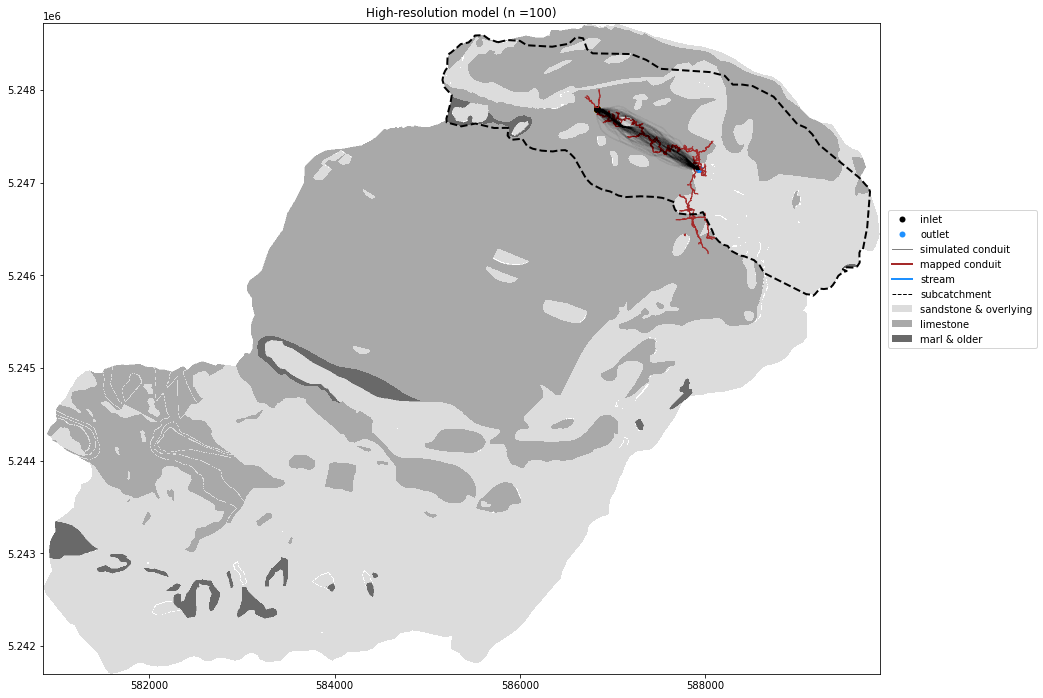

In [70]:
#Plot many iterations:
print('shuffle = ', shuffle)
f = plt.figure(figsize=(15,15))
ax = f.add_subplot(111, aspect='equal')
ax.set_title('High-resolution model (n ='+str(n)+')')

plt.imshow(catchment.get_geology(), origin='lower', extent=catchment.grid.extent, cmap=cmap_geo)
load_network('inputs/paper3/holloch3D', clean=True, plot=True, ax=ax, color='brown')

for i in range(n):
    catchment.show_network(ax=ax, data=catchment.karst_simulations[i], simplify=False, labels=[], plot_nodes=False, legend=False, color='k', alpha=1/n)
plt.scatter(catchment.inlets[:,0],  catchment.inlets[:,1],  c='k')
plt.scatter(catchment.outlets[:,0], catchment.outlets[:,1], c='dodgerblue')

plt.scatter(catchment.inlets[:,0],  catchment.inlets[:,1],  c='k')  
plt.scatter(catchment.outlets[:,0], catchment.outlets[:,1], c='dodgerblue')
#plt.scatter(streams[:,0], streams[:,1], c='dodgerblue', s=1)                         #plot streams
plt.plot(polygon[:,0], polygon[:,1], c='k', lw=2, ls='--')

label = False
if label:
    for i,inlet in enumerate(catchment.inlets):
        ax.annotate(str(i), xy=(inlet[0]+30*i,inlet[1]+100),color='k')
    for o,outlet in enumerate(catchment.outlets):
        ax.annotate(str(o), xy=(outlet[0]+30*o,outlet[1]),color='b')

legend = [matplotlib.lines.Line2D([0], [0], marker='o', color='none', markerfacecolor='k', markeredgecolor='none', label='inlet'),
          matplotlib.lines.Line2D([0], [0], marker='o', color='none', markerfacecolor='dodgerblue', markeredgecolor='none', label='outlet'),
          matplotlib.lines.Line2D([0], [0], color='grey', lw=1,          label='simulated conduit'),
          matplotlib.lines.Line2D([0], [0], color='brown',lw=2,          label='mapped conduit'),
          matplotlib.lines.Line2D([0], [0], color='dodgerblue', lw=2,    label='stream'),
          matplotlib.lines.Line2D([0], [0], color='k',    lw=1, ls='--', label='subcatchment'), 
          matplotlib.patches.Patch(facecolor='gainsboro', label='sandstone & overlying'),
          matplotlib.patches.Patch(facecolor='darkgray',  label='limestone'),
          matplotlib.patches.Patch(facecolor='dimgrey',   label='marl & older')]
plt.legend(handles=legend, loc=[1.01,0.5])